# LINEAR REGRESSOR ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('RADIATION.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
del df['UNIXTime']
del df['Data']
del df['Time']
del df['TimeSunRise']
del df['TimeSunSet']

In [4]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


In [5]:
df.rename(columns={'WindDirection(Degrees)':'WindDirection_Degrees'})

,Radiation,Temperature,Pressure,Humidity,WindDirection_Degrees,Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75
32682,1.17,44,30.42,102,117.78,6.75
32683,1.20,44,30.42,102,145.19,9.00
32684,1.23,44,30.42,101,164.19,7.87


In [6]:
df=df.dropna()

In [7]:
df.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed'],
      dtype='object')

In [8]:
x = df.drop(labels='Radiation', axis=1)
y = df.loc[:,'Radiation']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  26148
NUMBER OF TEST DATASET      :  6538
TOTAL NUMBER OF DATASET    :  32686


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  26148
NUMBER OF TEST DATASET      :  6538
TOTAL NUMBER OF DATASET    :  32686


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
LR = LinearRegression()
LR.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
predicted = LR.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF LINEAR REGRESSER IS :",R2*100)

THE R2 SCORE OF LINEAR REGRESSER IS : 51.363152618059395


In [15]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF LINEAR REGRESSER IS :",RAND*100)

THE ACCURACY SCORE OF LINEAR REGRESSER IS : 96.12764538240637


In [16]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF LINEAR REGRESSER IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF LINEAR REGRESSER IS : 0.5137945247595151


In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF LINEAR REGRESSER IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF LINEAR REGRESSER IS : 48319.1508550951


In [18]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF LINEAR REGRESSER IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF LINEAR REGRESSER IS : 9.680000000000003


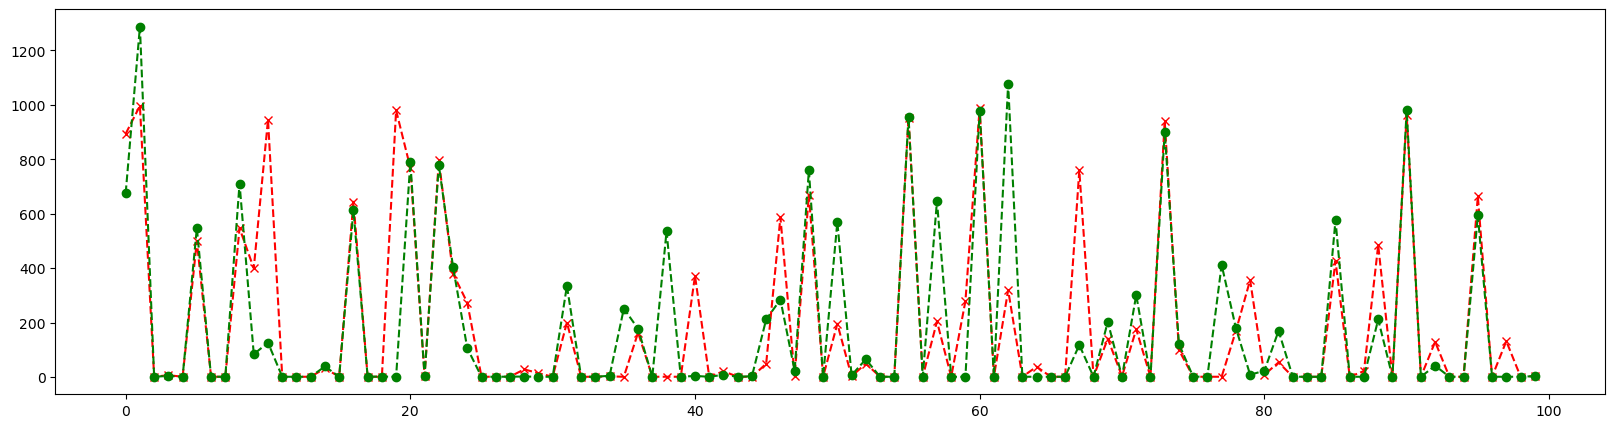

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(LR, 'RADIATION.pkl')

['RADIATION.pkl']